In [27]:
import pandas as pd

**IPL Analysis Using Python Pandas**

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

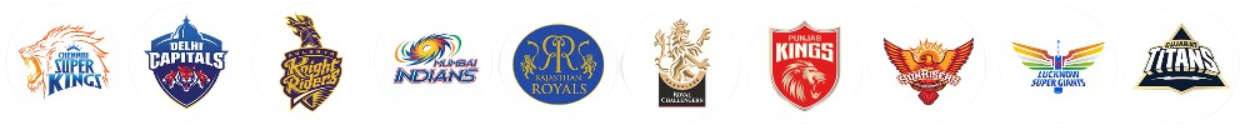

In [29]:
from IPython.display import Image, display

display(Image('/content/canvasnobg.png'))

In [30]:
# Reading the files as DataFrames

matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [6]:
# Merge deliveries with matches to bring in season, venue, etc.

In [31]:
# Merge on match ID
df = deliveries.merge(matches[['id', 'season', 'venue', 'team1', 'team2']],
                      left_on='match_id',
                      right_on='id',
                      how='left')

In [32]:
# Clean & convert columns
# ðŸ§¹ Remove unused columns

df.drop(['id'], axis=1, inplace=True)  # id from matches is now redundant

In [33]:
df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   

   ball       batter   bowler  non_striker  batsman_runs  ...  total_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0  ...           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0  ...           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0  ...           0   

   extras_type is_wicket  player_dismissed dismissal_kind fielder season  \
0      legbyes         0               NaN            NaN     NaN   2008   
1          NaN         0               NaN            NaN     NaN   2008   
2        wides         0               NaN            NaN     NaN   2008   
3          NaN         0               NaN            NaN     NaN   2008   
4          NaN         0               NaN            NaN     NaN   2008   

                   venue                        team1                  team2  
0  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
1  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
2  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
3  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
4  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  

[5 rows x 21 columns]

In [34]:
# ðŸ§¹ Convert column names to lowercase (optional)

df.columns = df.columns.str.lower()

In [35]:
df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   

   ball       batter   bowler  non_striker  batsman_runs  ...  total_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0  ...           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0  ...           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0  ...           0   

   extras_type is_wicket  player_dismissed dismissal_kind fielder season  \
0      legbyes         0               NaN            NaN     NaN   2008   
1          NaN         0               NaN            NaN     NaN   2008   
2        wides         0               NaN            NaN     NaN   2008   
3          NaN         0               NaN            NaN     NaN   2008   
4          NaN         0               NaN            NaN     NaN   2008   

                   venue                        team1                  team2  
0  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
1  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
2  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
3  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
4  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  

[5 rows x 21 columns]

In [36]:
# Handle nulls and NAs
# Example: Fill or drop common NAs

df['player_dismissed'] = df['player_dismissed'].fillna('Not Out')
df['dismissal_kind'] = df['dismissal_kind'].fillna('NA')

In [37]:
df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   

   ball       batter   bowler  non_striker  batsman_runs  ...  total_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0  ...           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0  ...           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0  ...           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0  ...           0   

   extras_type is_wicket  player_dismissed dismissal_kind fielder season  \
0      legbyes         0           Not Out             NA     NaN   2008   
1          NaN         0           Not Out             NA     NaN   2008   
2        wides         0           Not Out             NA     NaN   2008   
3          NaN         0           Not Out             NA     NaN   2008   
4          NaN         0           Not Out             NA     NaN   2008   

                   venue                        team1                  team2  
0  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
1  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
2  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
3  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  
4  M Chinnaswamy Stadium  Royal Challengers Bengaluru  Kolkata Knight Riders  

[5 rows x 21 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           9354 non-null    obj

In [39]:
# Fix dtypes if needed

# If season, match_id, or over are not integers:

df['season'] = df['season'].astype(int)
df['match_id'] = df['match_id'].astype(int)
df['over'] = df['over'].astype(int)
df['ball'] = df['ball'].astype(int)

In [40]:
# Save combined cleaned data (optional, if needed for further analysis)

df.to_csv('/content/ipl_cleaned.csv', index=False)

In [41]:
# import plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
# Merge to get season in deliveries
df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

In [43]:
df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bengaluru     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  \
0           1     legbyes          0              NaN            NaN     NaN   
1           0         NaN          0              NaN            NaN     NaN   
2           1       wides          0              NaN            NaN     NaN   
3           0         NaN          0              NaN            NaN     NaN   
4           0         NaN          0              NaN            NaN     NaN   

       id  season  
0  335982    2008  
1  335982    2008  
2  335982    2008  
3  335982    2008  
4  335982    2008

In [44]:
# Total Runs per Season
season_runs = df.groupby('season')['total_runs'].sum().reset_index()

# Matches per Season (for avg)

season_matches = matches.groupby('season')['id'].nunique().reset_index(name='match_count')

# **Analyze run trends over the years**

In [45]:
season_matches

season  match_count
0     2008           58
1     2009           57
2     2010           60
3     2011           73
4     2012           74
5     2013           76
6     2014           60
7     2015           59
8     2016           60
9     2017           59
10    2018           60
11    2019           60
12    2020           60
13    2021           60
14    2022           74
15    2023           74
16    2024           71

In [46]:
season_runs

season  total_runs
0     2008       17937
1     2009       16353
2     2010       18883
3     2011       21154
4     2012       22453
5     2013       22602
6     2014       18931
7     2015       18353
8     2016       18862
9     2017       18786
10    2018       19901
11    2019       19434
12    2020       19416
13    2021       18637
14    2022       24395
15    2023       25688
16    2024       25971

In [47]:
# Combine both

season_stats = season_runs.merge(season_matches, on='season')
season_stats['avg_runs_per_match'] = season_stats['total_runs'] / season_stats['match_count']




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




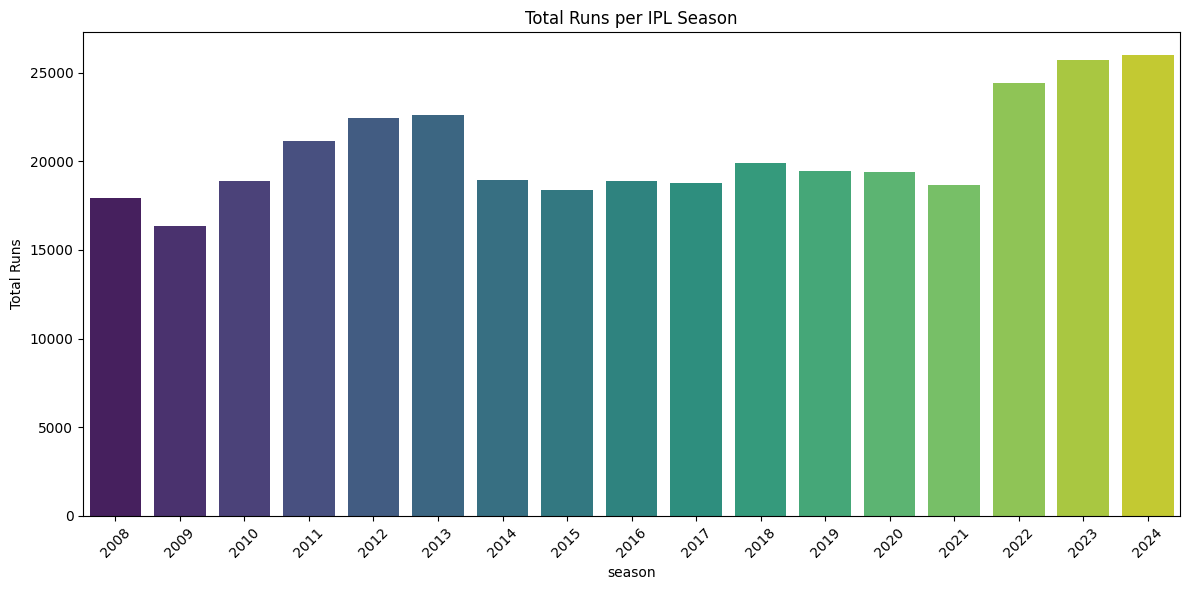

In [48]:
# Barplot â€“ Total Runs per Season (Matplotlib + Seaborn)

plt.figure(figsize=(12,6))
sns.barplot(x='season', y='total_runs', data=season_stats, palette='viridis')
plt.title('Total Runs per IPL Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

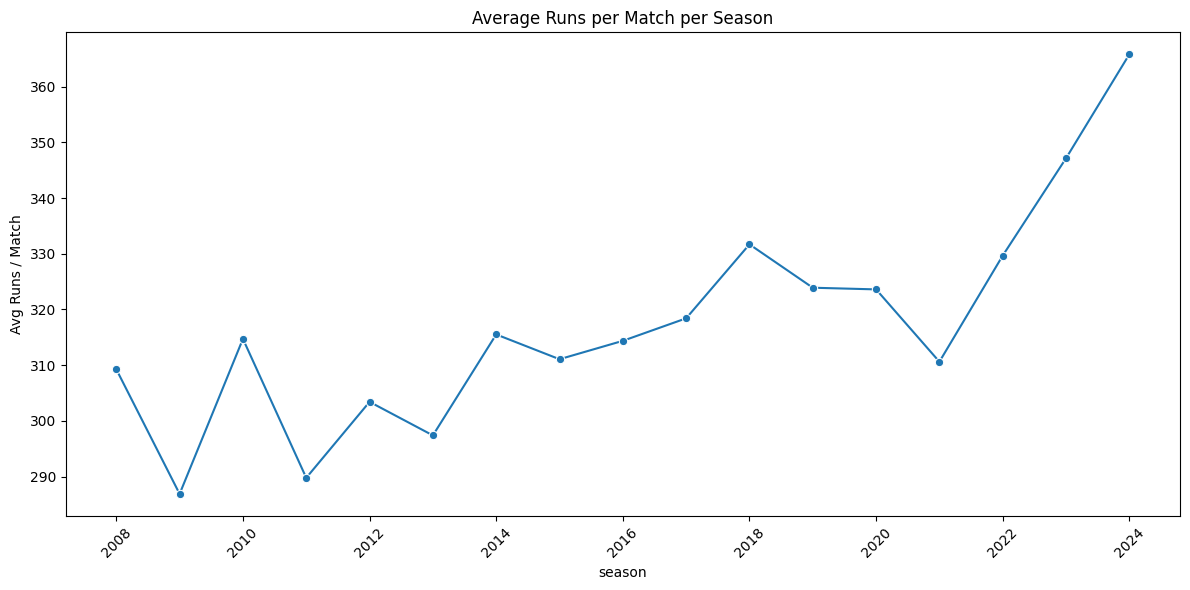

In [49]:
# Line Chart â€“ Average Runs per Match per Season (Seaborn)

plt.figure(figsize=(12,6))
sns.lineplot(x='season', y='avg_runs_per_match', data=season_stats, marker='o')
plt.title('Average Runs per Match per Season')
plt.ylabel('Avg Runs / Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Interactive Plotly Chart

fig = px.line(season_stats, x='season', y='avg_runs_per_match',
              title='Interactive: Avg Runs per Match Over IPL Seasons',
              markers=True)
fig.update_traces(line_color='crimson')
fig.show()

# **Compare batting styles (anchor vs aggressive) via strike rate and boundary %**

In [51]:
# Calculate per-batter stats

# Filter out extras like wides/noballs
valid_balls = deliveries[
    deliveries['extras_type'].isna() |
    (~deliveries['extras_type'].isin(['wides', 'noballs']))
]

# Calculate stats
batter_stats = valid_balls.groupby('batter').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

batter_stats['strike_rate'] = batter_stats['runs'] / batter_stats['balls'] * 100
batter_stats['boundary_pct'] = (batter_stats['fours'] + batter_stats['sixes']) / batter_stats['balls'] * 100

# Filter to batters who faced enough balls (e.g., 200+)
batter_stats = batter_stats[batter_stats['balls'] >= 200]

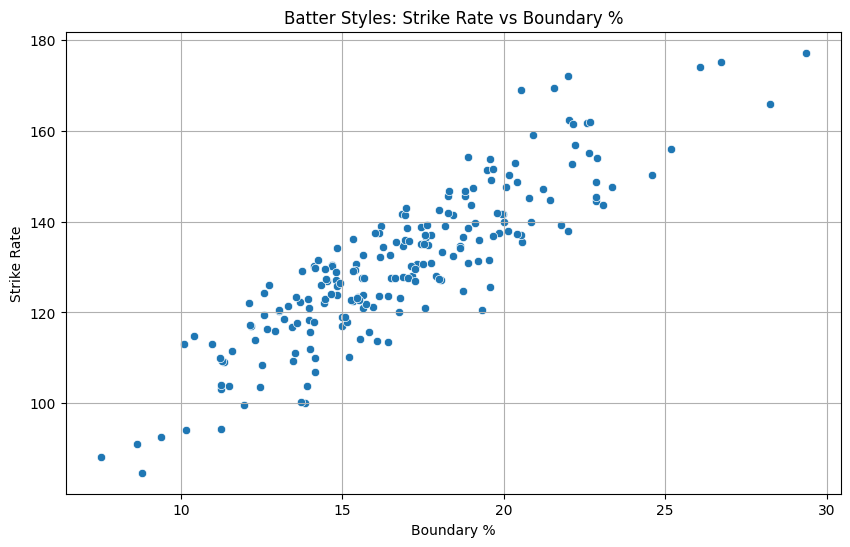

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=batter_stats, x='boundary_pct', y='strike_rate')
plt.title('Batter Styles: Strike Rate vs Boundary %')
plt.xlabel('Boundary %')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()

In [53]:
# Interactive Plotly Bubble Chart


fig = px.scatter(
    batter_stats,
    x='boundary_pct',
    y='strike_rate',
    size='runs',
    text='batter',
    hover_name='batter',
    title='Batting Styles: Anchor vs Aggressive (IPL)',
    labels={'boundary_pct': 'Boundary %', 'strike_rate': 'Strike Rate'}
)
fig.update_traces(textposition='top center')
fig.show()

In [54]:
# Categorize Player Types

def label_style(row):
    if row['strike_rate'] >= 140 and row['boundary_pct'] >= 20:
        return 'Aggressive'
    elif row['strike_rate'] < 120 and row['boundary_pct'] < 15:
        return 'Anchor'
    else:
        return 'Mixed'

batter_stats['style'] = batter_stats.apply(label_style, axis=1)

In [56]:
# Catgorizing Batters

    ðŸ”µ Blue â†’ Anchor
    ðŸŸ¥ Red â†’ Aggressive
    ðŸŸ¢ Green â†’ Mixed

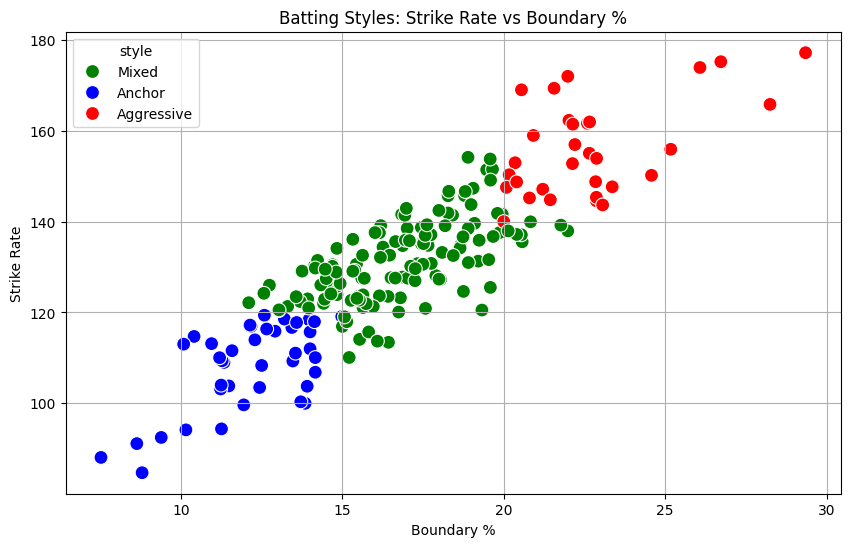

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=batter_stats,
    x='boundary_pct',
    y='strike_rate',
    hue='style',
    palette={'Aggressive': 'red', 'Anchor': 'blue', 'Mixed': 'green'},
    s=100  # size of points
)
plt.title('Batting Styles: Strike Rate vs Boundary %')
plt.xlabel('Boundary %')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()



In [58]:
import plotly.express as px

fig = px.scatter(
    batter_stats,
    x='boundary_pct',
    y='strike_rate',
    color='style',
    size='runs',
    hover_name='batter',
    title='Batting Styles: Anchor vs Aggressive',
    labels={
        'boundary_pct': 'Boundary %',
        'strike_rate': 'Strike Rate'
    },
    color_discrete_map={
        'Anchor': 'blue',
        'Aggressive': 'red',
        'Mixed': 'green'
    }
)
fig.update_traces(textposition='top center')
fig.show()

# **Study bowling consistency (dot balls, economy rate, average)**



Key Metrics for Bowling Consistency<br>
Metric	             &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Formula<br>
Dot Ball %	           &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;Dot Balls / Legal Deliveries * 100<br>
Economy	              &nbsp;&nbsp;&nbsp;&nbsp;  &nbsp;&nbsp;&nbsp;&nbsp;Runs Conceded / Overs Bowled<br>
Bowling Average	      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Runs Conceded / Wickets Taken (how costly each wicket was)<br>



In [59]:
# Clean and Filter Legal Deliveries

# Filter legal deliveries (exclude wides and no-balls)
legal_deliveries = deliveries[
    deliveries['extras_type'].isna() |
    ~deliveries['extras_type'].isin(['wides', 'noballs'])
]

In [60]:
bowling_stats = legal_deliveries.groupby('bowler').agg(
    Balls_Bowled=('ball', 'count'),
    Runs_Conceded=('total_runs', 'sum'),
    Wickets=('is_wicket', 'sum'),
    Dot_Balls=('total_runs', lambda x: (x == 0).sum())
).reset_index()

# Compute final metrics
bowling_stats['Overs'] = bowling_stats['Balls_Bowled'] / 6
bowling_stats['Economy'] = bowling_stats['Runs_Conceded'] / bowling_stats['Overs']
bowling_stats['Bowling_Average'] = bowling_stats['Runs_Conceded'] / bowling_stats['Wickets']
bowling_stats['DotBall%'] = (bowling_stats['Dot_Balls'] / bowling_stats['Balls_Bowled']) * 100

# Filter: minimum 300 balls
bowling_stats = bowling_stats[bowling_stats['Balls_Bowled'] >= 300]

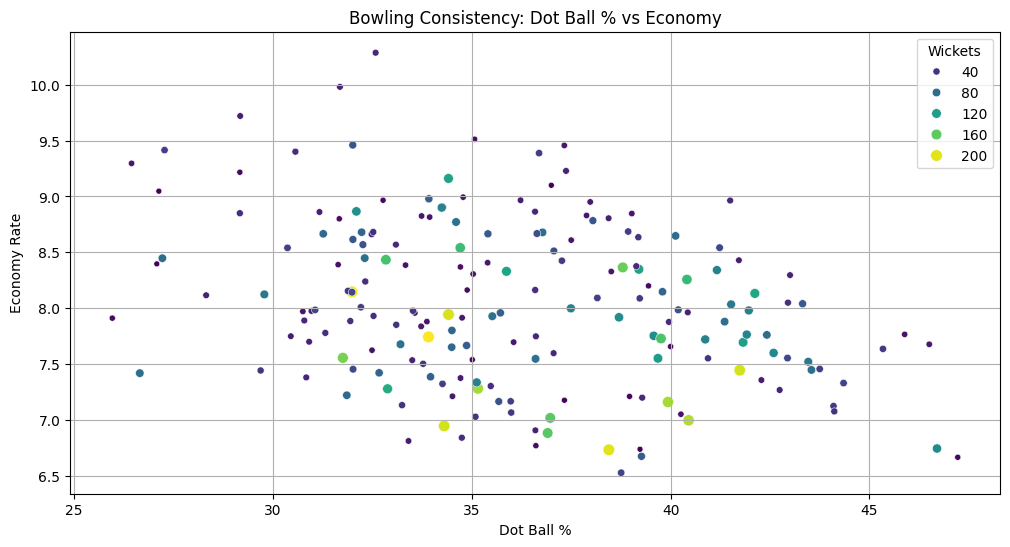

In [62]:
# Dot Ball % vs Economy (Seaborn)


plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=bowling_stats,
    x='DotBall%',
    y='Economy',
    size='Wickets',
    hue='Wickets',
    palette='viridis',
    legend=True
)

plt.title('Bowling Consistency: Dot Ball % vs Economy')
plt.xlabel('Dot Ball %')
plt.ylabel('Economy Rate')
plt.grid(True)
plt.show()

In [63]:
fig = px.scatter(
    bowling_stats,
    x='DotBall%',
    y='Economy',
    size='Wickets',
    color='Bowling_Average',
    hover_name='bowler',
    title='Bowling Consistency â€“ IPL',
    labels={
        'DotBall%': 'Dot Ball %',
        'Economy': 'Economy Rate',
        'Bowling_Average': 'Avg (Runs per Wicket)'
    },
    color_continuous_scale='Turbo'
)
fig.show()

In [64]:
# Bonus: Identify Top Consistent Bowlers

top_bowlers = bowling_stats.sort_values(by=['DotBall%', 'Economy'], ascending=[False, True]).head(10)
print(top_bowlers[['bowler', 'DotBall%', 'Economy', 'Bowling_Average', 'Wickets']])

            bowler   DotBall%   Economy  Bowling_Average  Wickets
147     GD McGrath  47.222222  6.666667        25.714286       14
138       DW Steyn  46.700275  6.745188        23.361905      105
84   BW Hilfenhaus  46.505376  7.677419        20.695652       23
170      IC Pandey  45.887446  7.766234        31.473684       19
417    S Sreesanth  45.340909  7.636364        26.046512       43
184      JC Archer  44.350581  7.330517        23.612245       49
132      DP Nannes  44.117647  7.077399        20.052632       38
117   DE Bollinger  44.097222  7.125000        15.906977       43
381      RJ Harris  43.750000  7.456731        22.000000       47
289       MM Patel  43.542435  7.447970        20.512195       82


# **Visualize performance in different overs (Powerplay, Death)**

ðŸŽ¯ Goals:<br>

    Classify overs into phases: Powerplay, Middle, Death<br><br>

    Calculate performance metrics per phase<br><br>

    Visualize: Heatmaps / Bar Charts / Bubble Charts

In [66]:
# Add Over Phase Column

def over_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

deliveries['phase'] = deliveries['over'].apply(over_phase)

In [67]:
# Filter Legal Deliveries

legal_deliveries = deliveries[
    deliveries['extras_type'].isna() |
    ~deliveries['extras_type'].isin(['wides', 'noballs'])
]

In [68]:
 # Calculate Metrics per Phase

phase_stats = legal_deliveries.groupby(['bowler', 'phase']).agg(
    Balls=('ball', 'count'),
    Runs=('total_runs', 'sum'),
    Wickets=('is_wicket', 'sum'),
    DotBalls=('total_runs', lambda x: (x == 0).sum())
).reset_index()

# Add derived metrics
phase_stats['Overs'] = phase_stats['Balls'] / 6
phase_stats['Economy'] = phase_stats['Runs'] / phase_stats['Overs']
phase_stats['DotBall%'] = (phase_stats['DotBalls'] / phase_stats['Balls']) * 100

/tmp/ipython-input-69-1385549497.py:2: FutureWarning:






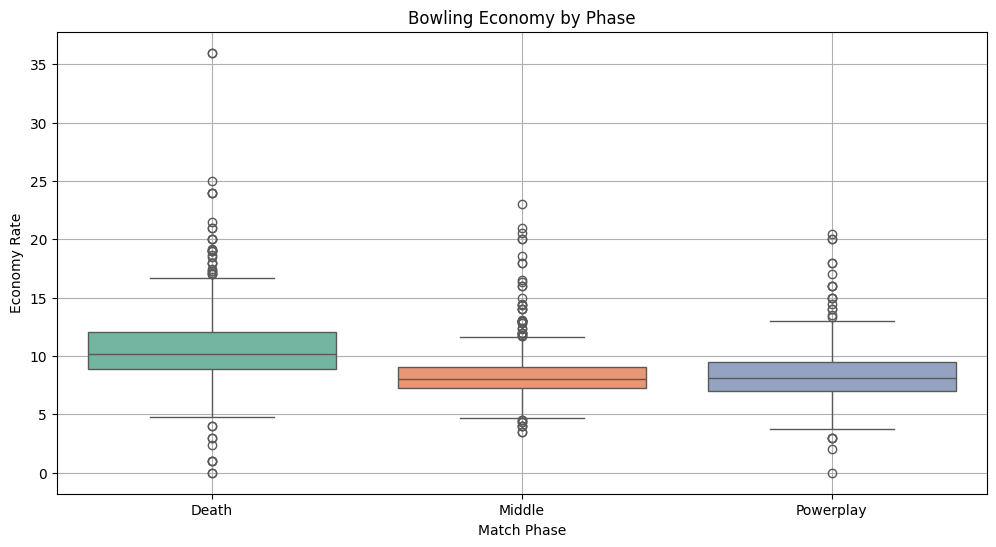

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=phase_stats, x='phase', y='Economy', palette='Set2')
plt.title('Bowling Economy by Phase')
plt.ylabel('Economy Rate')
plt.xlabel('Match Phase')
plt.grid(True)
plt.show()

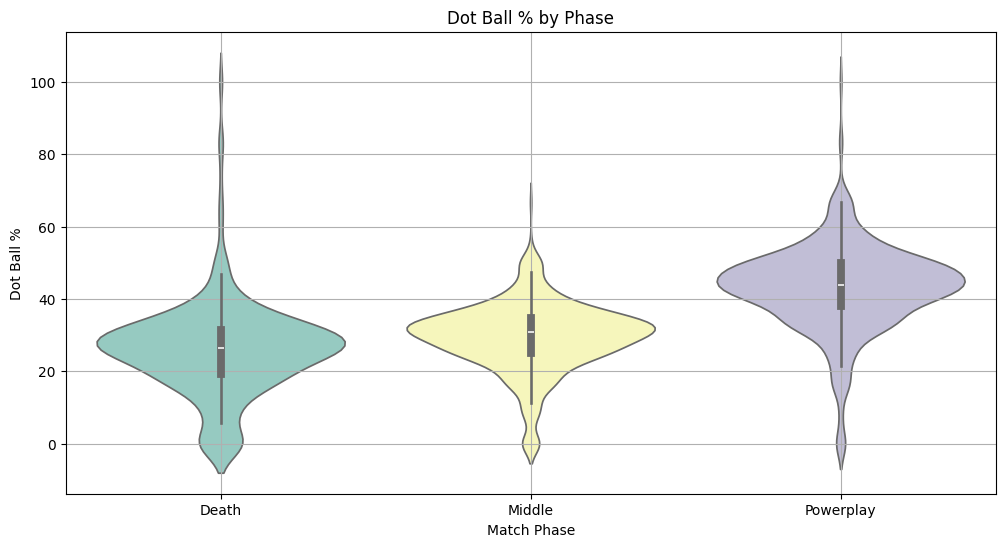

In [70]:
# Dot Ball %

plt.figure(figsize=(12, 6))
sns.violinplot(data=phase_stats, x='phase', y='DotBall%', palette='Set3')
plt.title('Dot Ball % by Phase')
plt.ylabel('Dot Ball %')
plt.xlabel('Match Phase')
plt.grid(True)
plt.show()

In [71]:
# Interactive

In [72]:
death_stats = phase_stats[(phase_stats['phase'] == 'Death') & (phase_stats['Balls'] >= 60)]

fig = px.scatter(
    death_stats,
    x='DotBall%',
    y='Economy',
    size='Wickets',
    color='bowler',
    hover_name='bowler',
    title='Bowler Performance in Death Overs',
    labels={'DotBall%': 'Dot Ball %', 'Economy': 'Economy Rate'}
)
fig.update_traces(marker=dict(opacity=0.7))
fig.show()

# Insights to Look For:

High Dot%, Low Econ	ðŸŽ¯ Elite Death Bowler (e.g., Bumrah)<br>
Low Dot%, High Econ	ðŸ›‘ Leaky / less effective in pressure<br>
High Dot%, High Econ	ðŸŽ² Defensive but not economical<br>

# **Compare venue behavior in high-scoring vs low-scoring matches**

ðŸŽ¯ Goal:<br>

    Analyze which venues consistently produce high scores (batting-friendly)<br>

    Identify low-scoring venues (bowling-friendly)<br>

    Classify matches into high and low scoring based on total match runs<br>

In [74]:
# Merge to get venue & match data
df = deliveries.merge(
    matches[['id', 'venue']],
    left_on='match_id', right_on='id',
    how='left'
)
# Compute Match Total Runs

match_totals = df.groupby(['match_id', 'venue'])['total_runs'].sum().reset_index()
match_totals.rename(columns={'total_runs': 'match_runs'}, inplace=True)

In [75]:
# Classify as High vs Low Scoring

# Use a fixed threshold (e.g., 350) or median:

# Option 1: Based on median
threshold = match_totals['match_runs'].median()

# Option 2: Use fixed value
# threshold = 350

match_totals['score_type'] = match_totals['match_runs'].apply(lambda x: 'High' if x >= threshold else 'Low')

In [76]:
# Venue-wise Summary

venue_summary = match_totals.groupby(['venue', 'score_type']).size().unstack(fill_value=0)

# Add total matches & percentage of high scoring games
venue_summary['Total_Matches'] = venue_summary.sum(axis=1)
venue_summary['HighScoring%'] = (venue_summary['High'] / venue_summary['Total_Matches']) * 100

venue_summary = venue_summary.sort_values('HighScoring%', ascending=False)



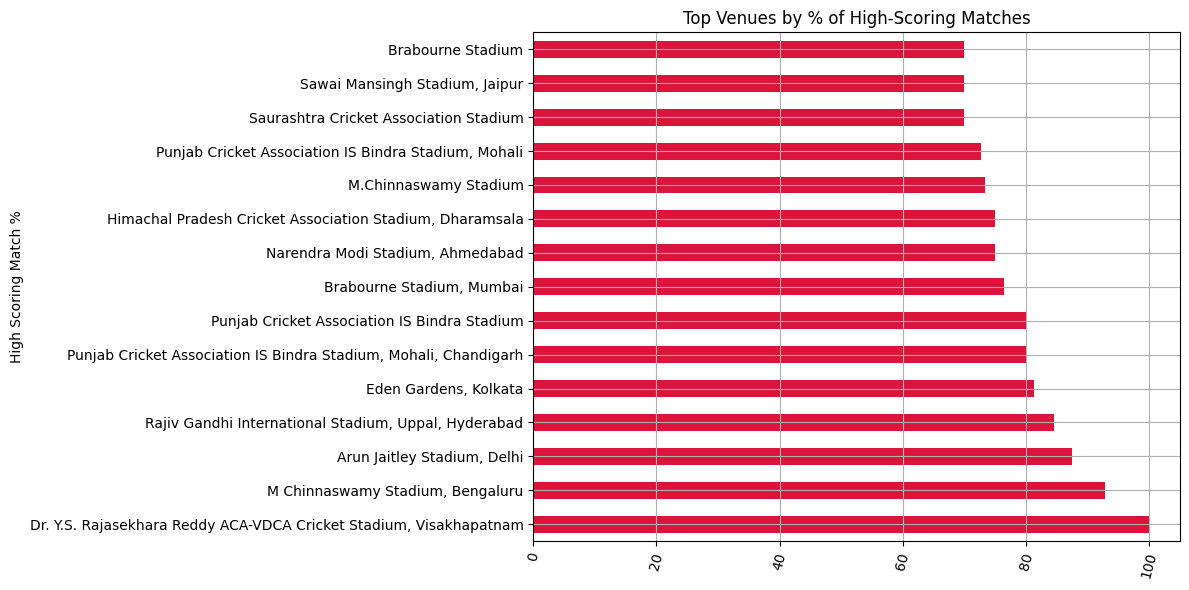

In [78]:
# Visualize â€“ Top 15 Venues by High Scoring %
# ðŸ“Š Matplotlib Bar Chart

top_venues = venue_summary.head(15)

plt.figure(figsize=(12,6))
top_venues['HighScoring%'].plot(kind='barh', color='crimson')
plt.title('Top Venues by % of High-Scoring Matches')
plt.ylabel('High Scoring Match %')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()



In [82]:
fig = px.bar(
    venue_summary.reset_index(),
    x='venue',
    y='HighScoring%',
    title='Venue-wise High Scoring Match %',
    labels={'HighScoring%': 'High Scoring %'},
    color='HighScoring%',
    color_continuous_scale='Reds'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

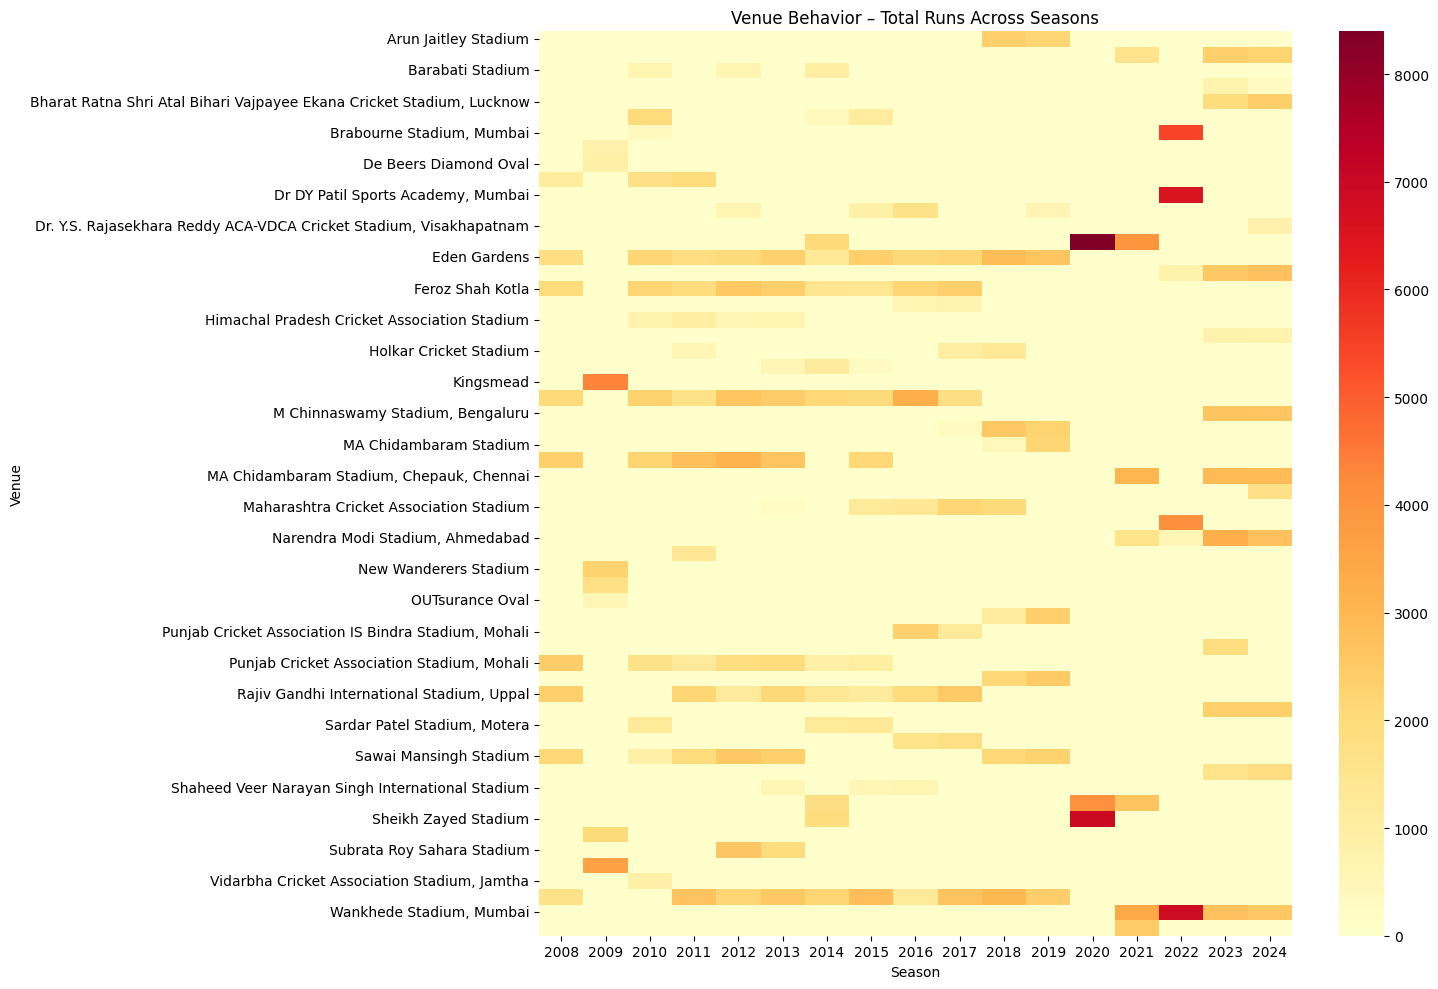

In [83]:
# Bonus: Heatmap of Venue Behavior Over Years

# First, merge season info
df = df.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

venue_season = df.groupby(['venue', 'season'])['total_runs'].sum().reset_index()

pivot = venue_season.pivot(index='venue', columns='season', values='total_runs').fillna(0)

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Venue Behavior â€“ Total Runs Across Seasons')
plt.xlabel('Season')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()